# Multiple Linear Regression
## Bike sharing

#### Problem Statement:

BoomBikes, a US bike-sharing service, faced a revenue decline during the COVID-19 pandemic and seeks a recovery plan. The company aims to understand post-pandemic shared bike demand to outpace competitors and maximize profits. They contracted a consultancy to identify significant factors influencing bike demand and their predictive strength. BoomBikes collected a comprehensive dataset of daily bike demand, influenced by meteorological and lifestyle factors. This analysis will help BoomBikes strategize for market revival and sustained growth post-lockdown.


- Objective: Develop a model to predict shared bike demand based on the provided independent variables.
- Purpose: Help management understand how demand varies with different features to inform business strategies.
- Strategic Goal: Adjust operations and marketing to align with customer expectations and demand trends.
- Market Insight: Use the model to comprehend demand dynamics in new markets.
- Outcome: Provide actionable insights for better decision-making and improved market adaptation.

## Step 1: Reading and Understanding the data

In [3]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [4]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


In [5]:
data = pd.read_csv('day.csv')
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
# Checking shape of data set
data.shape

(730, 16)

In [7]:
#info of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
#describe the dataset
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


##### As mentioned in the data dictionary that the target variable is `cnt` and is equal to total rental bikes including both `casual` and `registered` . Hence columns `casual` and `registered` will not take part in the model creation and can be removed from data set. We can also remove `instant` column as well becaue this is just row index.
- casual , registered : not required

- instant : can remove because its just row number

- dteday : we already have year and month data in the dataframe

#### Remove columns `casual` , `registered`, `instant`, `dteday`

In [11]:
data.drop(['casual', 'registered', 'instant', 'dteday' ], axis=1, inplace = True)
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


#### Check if there are any null values for any columns

In [13]:
data.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

#### Observation : There are no null values for any columns.

### Check for duplicates:

In [16]:
data.drop_duplicates(inplace=True)
data.shape

(730, 12)

#### Observation : There are no duplicates as the shape of dataframe remained same.

### Rename columns name for clear reading and analysis puropse.
Let's rename :

- `yr` : year

- `mnth` : month

- `hum` : humidity

- `weathersit` : weather

In [19]:
data.rename(columns ={'yr': 'year', 'mnth': 'month', 'hum':'humidity', 'weathersit':'weather'}, inplace= True)

We can see that there are columns like season, year, month, workingday & weather which has categorical values. Lets map these values to actual values from data dictionary so 
- that while doing EDA we can correctly understand the data
- it will help us in creating dummy variables as well.


#### Mapping the categorical values from data dictionary

In [22]:
data['season'] = data['season'].map({1:'spring', 2:'summer', 3:'fall' , 4:'winter'})
data['weather'] = data['weather'].map({1:'Clear', 2:'Mist', 3:'LightSnow', 4:'HeavySnowRain'})
data['month']= data['month'].map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
data['weekday']= data['weekday'].map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
data.head()

,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


## Step 2: Visualising the data
We'll visualise our data using matplotlib and seaborn.

#### We can observe that:
- Categorical columns are : [ season, year, month, holiday, weekday, workingday, weather ] 

- Numerical columns are   : [ temp, atemp, humidity, windspeed, cnt] 

### Analysing the categorical column with target variable `cnt`

In [26]:
# Creating generic function to plot boxlplot

def PlotBoxPlot(totRow, totCol, curIndex, colName, targetVarColName, data):
    plt.subplot( totRow, totCol, curIndex)
    sns.boxplot(x= colName, y= targetVarColName, data = data)

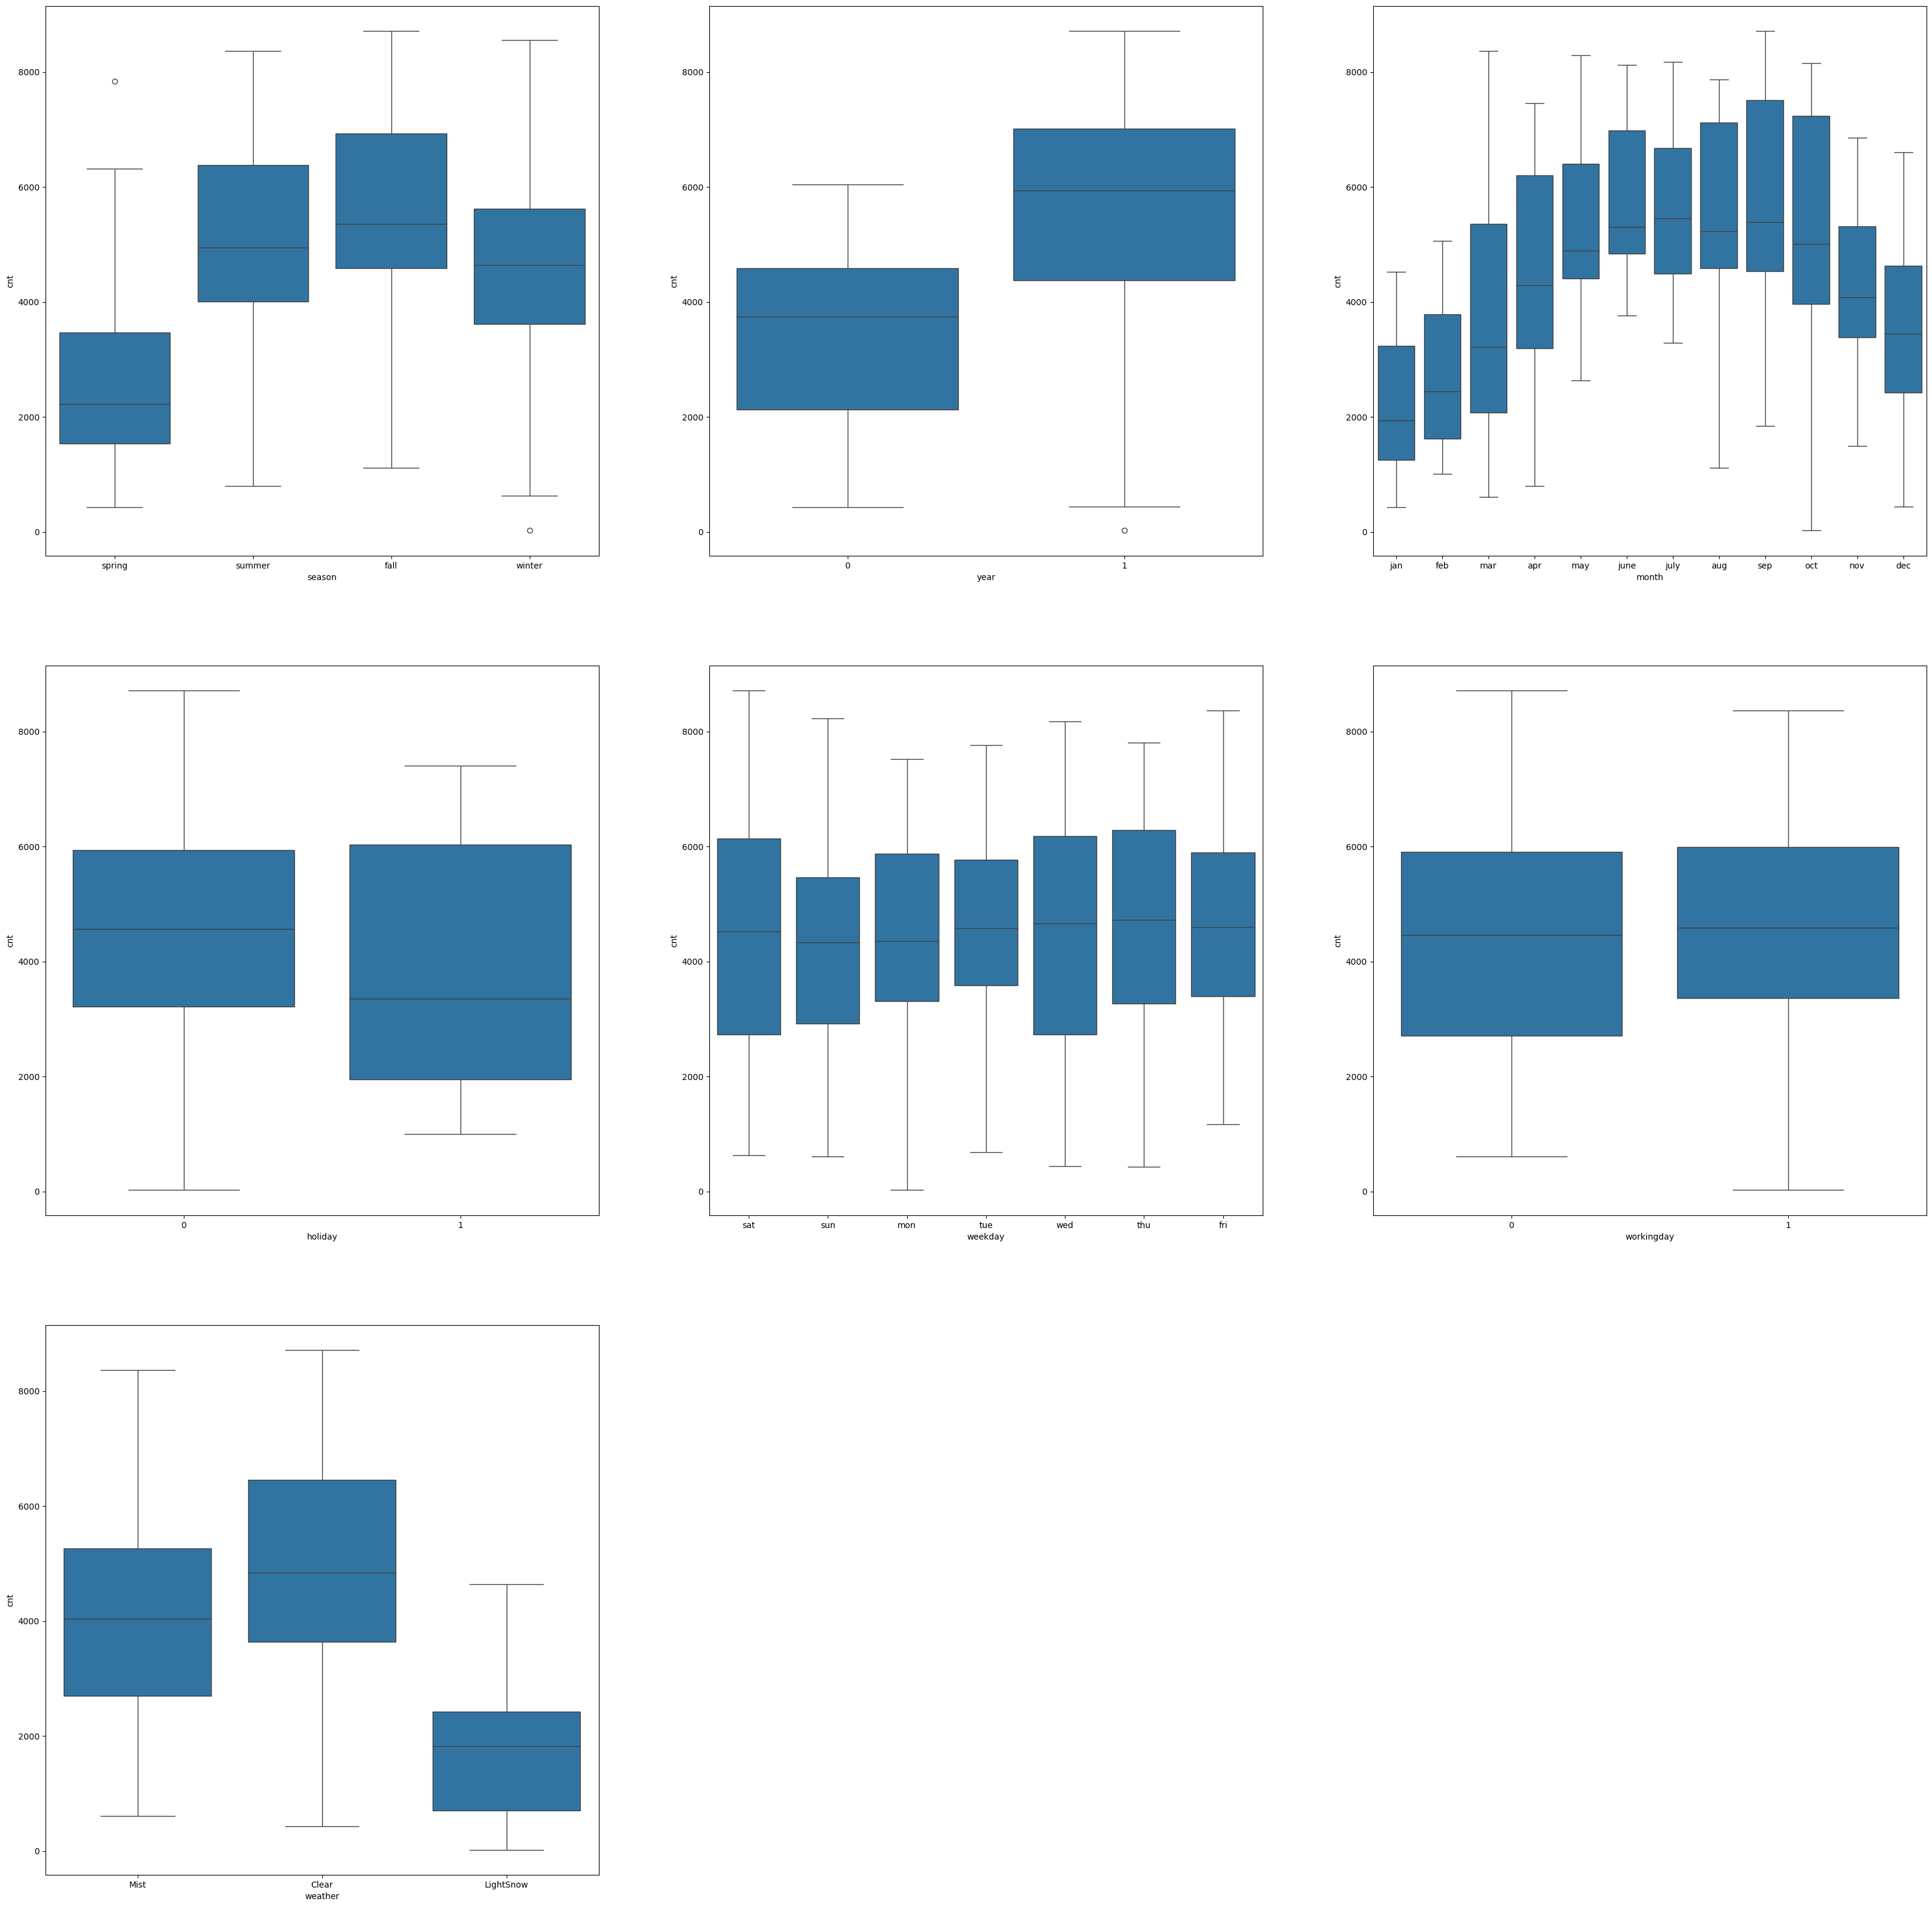

In [27]:
plt.figure(figsize=(40, 40))
categorialColName = ['season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weather']
targetColName = 'cnt'
sqrtVal = math.floor(math.sqrt(len(categorialColName)))
totRow = (sqrtVal+1) if sqrtVal*sqrtVal != len(categorialColName) else sqrt
totCol = totRow

index = 1
for col in categorialColName: 
    PlotBoxPlot(totRow, totCol, index, col, targetColName, data)
    index +=1

#### Analysing some of the categoraical columns with target variable `cnt` using barplot

In [29]:
# Creating generic method to plot barplot
def BarPlot(data, x, y, hue):
    plt.figure(figsize = (6,6))
    sns.barplot(data, x=x , y=y, hue= hue)
    plt.show()

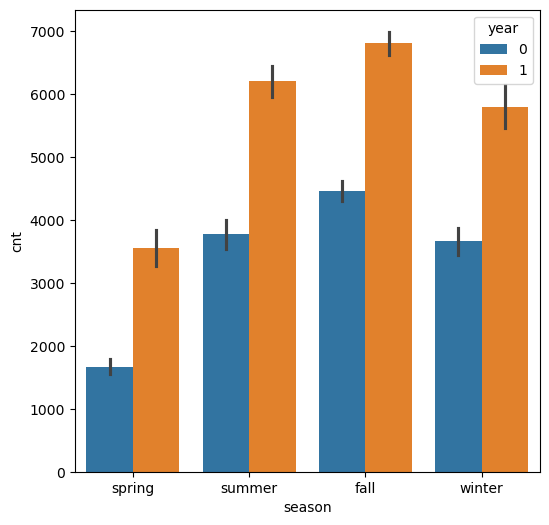

In [30]:
# Season vs Cnt
BarPlot(data, 'season', 'cnt', 'year')

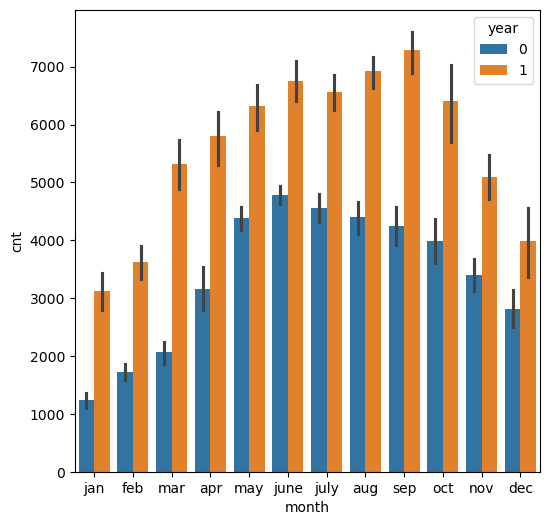

In [31]:
# Season vs Cnt
BarPlot(data, 'month', 'cnt', 'year')

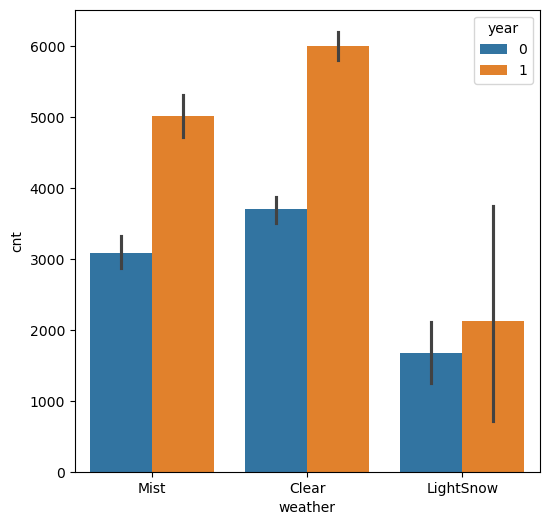

In [32]:
# Weather Vs cnt
BarPlot(data, 'weather', 'cnt', 'year')

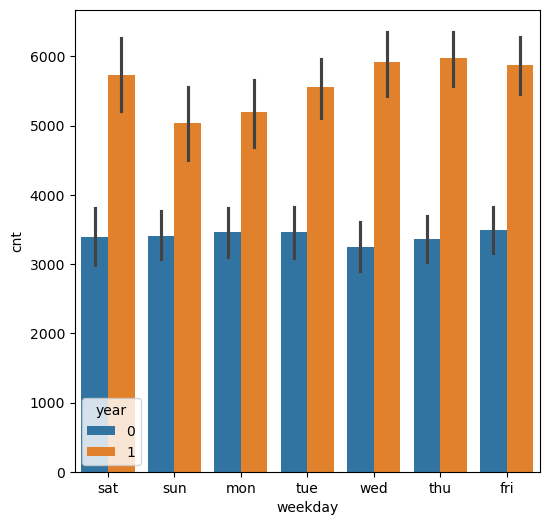

In [33]:
# weekday Vs cnt
BarPlot(data, 'weekday', 'cnt', 'year')

### Observations : 
- We can observe that there are no outliers to handle
- Fall season has highest demand
- In year 2019 the demand has grown
- Demand grows from `jan` to `july` and then decreases from `aug` to `dec`
- In case of holiday the demand decreases
- Weekday has no effect on demand
- Clear weather situation has highest demand

### Analysing numerical columns using pair plot

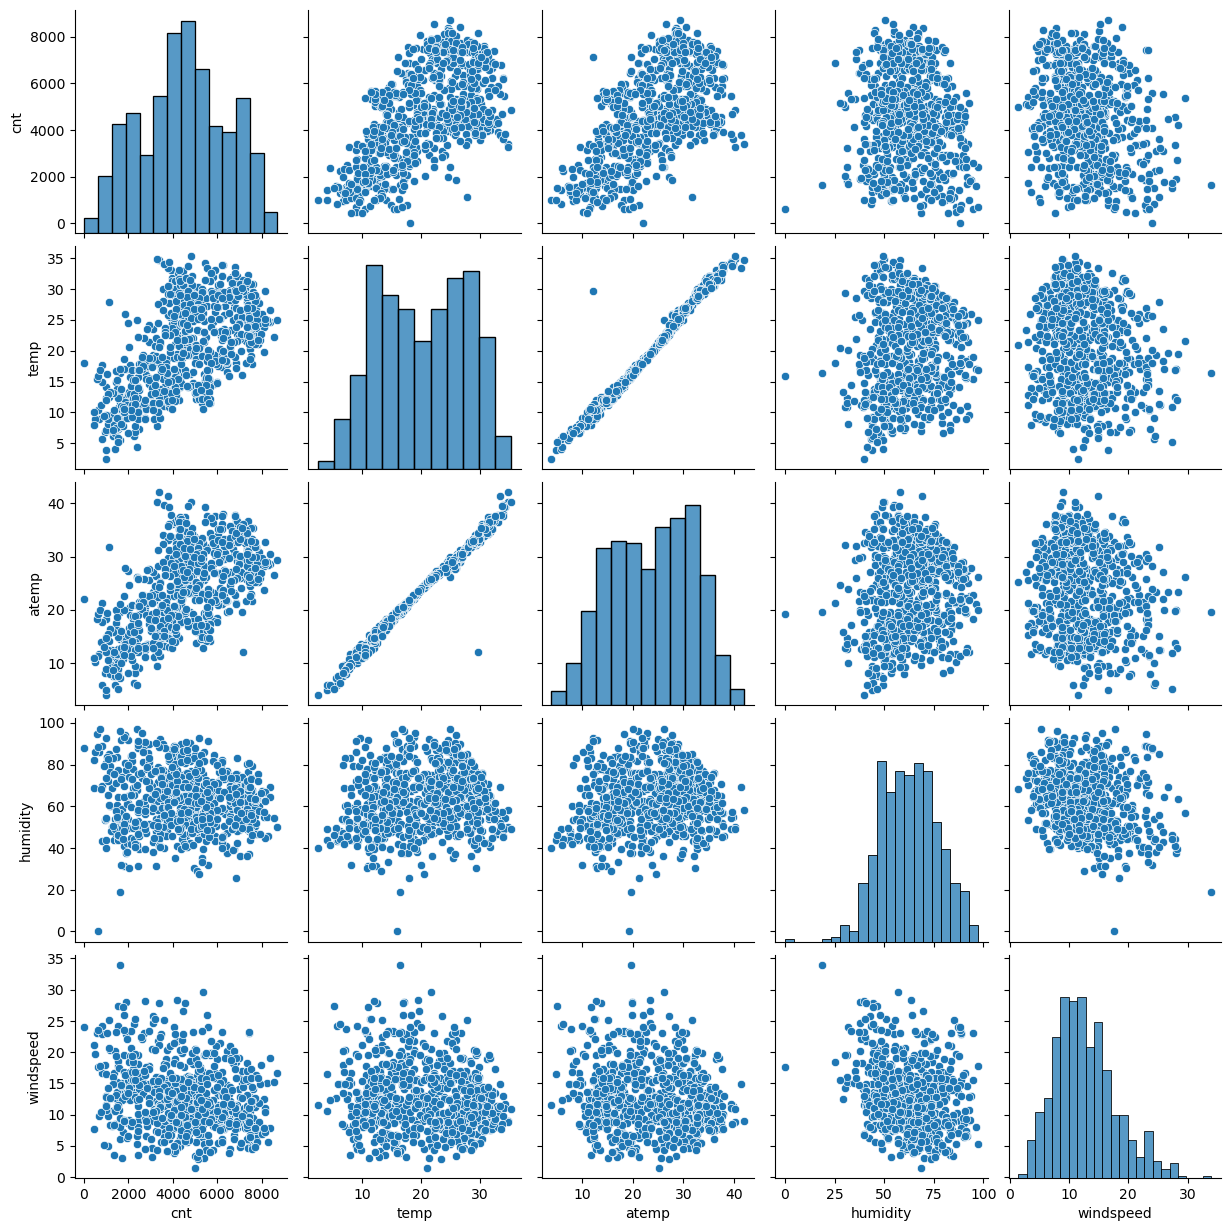

In [36]:
numericalCols = [ 'cnt', 'temp', 'atemp', 'humidity', 'windspeed']
sns.pairplot(data= data, vars= numericalCols)
plt.show()

#### Plotting heat map for numerical columns

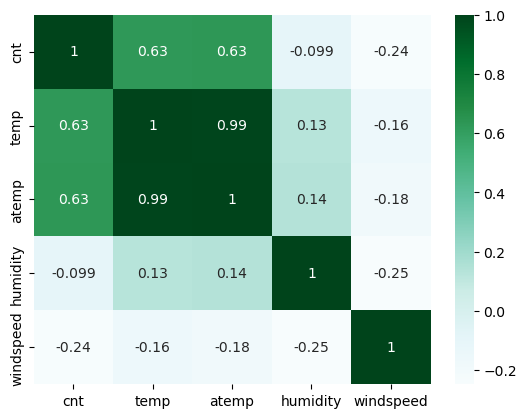

In [38]:
sns.heatmap(data[numericalCols].corr(), cmap='BuGn', annot = True)
plt.show()

### Observation :
- From pair plot and the heat map we can see that `temp` and `atemp` columns are having very high correlation **(~0.99)**
- The reason could be that atemp is derived from temp column.
- We can see some degree of collinearity for cnt and temp as well. However during model creation we will validate this.

## Step 3: Data preparation

#### For categorical columns we will create dummy variables

In [42]:
data.head()

,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [43]:
#creating dummy variables for season, month, weekday, weather columns

season_dum = pd.get_dummies(data['season'], drop_first = True, dtype = int)
month_dum = pd.get_dummies(data['month'], drop_first = True, dtype = int)
weekday_dum = pd.get_dummies(data['weekday'], drop_first = True, dtype = int)
weather_dum = pd.get_dummies(data['weather'], drop_first = True, dtype = int)

In [44]:
# join the dummy variable columns to the main dataframe data
data = pd.concat([data, season_dum, month_dum, weekday_dum, weather_dum ], axis=1)

# remove the columns for which dummy columns have been created
data.drop(['season', 'month', 'weekday', 'weather'], axis=1, inplace = True)
data.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,LightSnow,Mist
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [45]:
data.shape

(730, 30)

In [46]:
#check new columns
data.columns

Index(['year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'cnt', 'spring', 'summer', 'winter', 'aug', 'dec', 'feb',
       'jan', 'july', 'june', 'mar', 'may', 'nov', 'oct', 'sep', 'mon', 'sat',
       'sun', 'thu', 'tue', 'wed', 'LightSnow', 'Mist'],
      dtype='object')

In [47]:
#check data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   humidity    730 non-null    float64
 6   windspeed   730 non-null    float64
 7   cnt         730 non-null    int64  
 8   spring      730 non-null    int64  
 9   summer      730 non-null    int64  
 10  winter      730 non-null    int64  
 11  aug         730 non-null    int64  
 12  dec         730 non-null    int64  
 13  feb         730 non-null    int64  
 14  jan         730 non-null    int64  
 15  july        730 non-null    int64  
 16  june        730 non-null    int64  
 17  mar         730 non-null    int64  
 18  may         730 non-null    int64  
 19  nov         730 non-null    i

## Step 4: Splitting the data into training and testing sets

In [49]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
data_train, data_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [50]:
data_train.shape

(510, 30)

In [51]:
data_test.shape

(219, 30)

In [52]:
data_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,LightSnow,Mist
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,0,0,1,0,0,0,0,0,1


### Feature scaling : scale the numerical columns using Min-Max scaler

In [54]:
scaler = MinMaxScaler()

In [55]:
data_train[numericalCols] = scaler.fit_transform(data_train[numericalCols])
data_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,LightSnow,Mist
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,0,1


In [56]:
# train data describe
data_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,LightSnow,Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


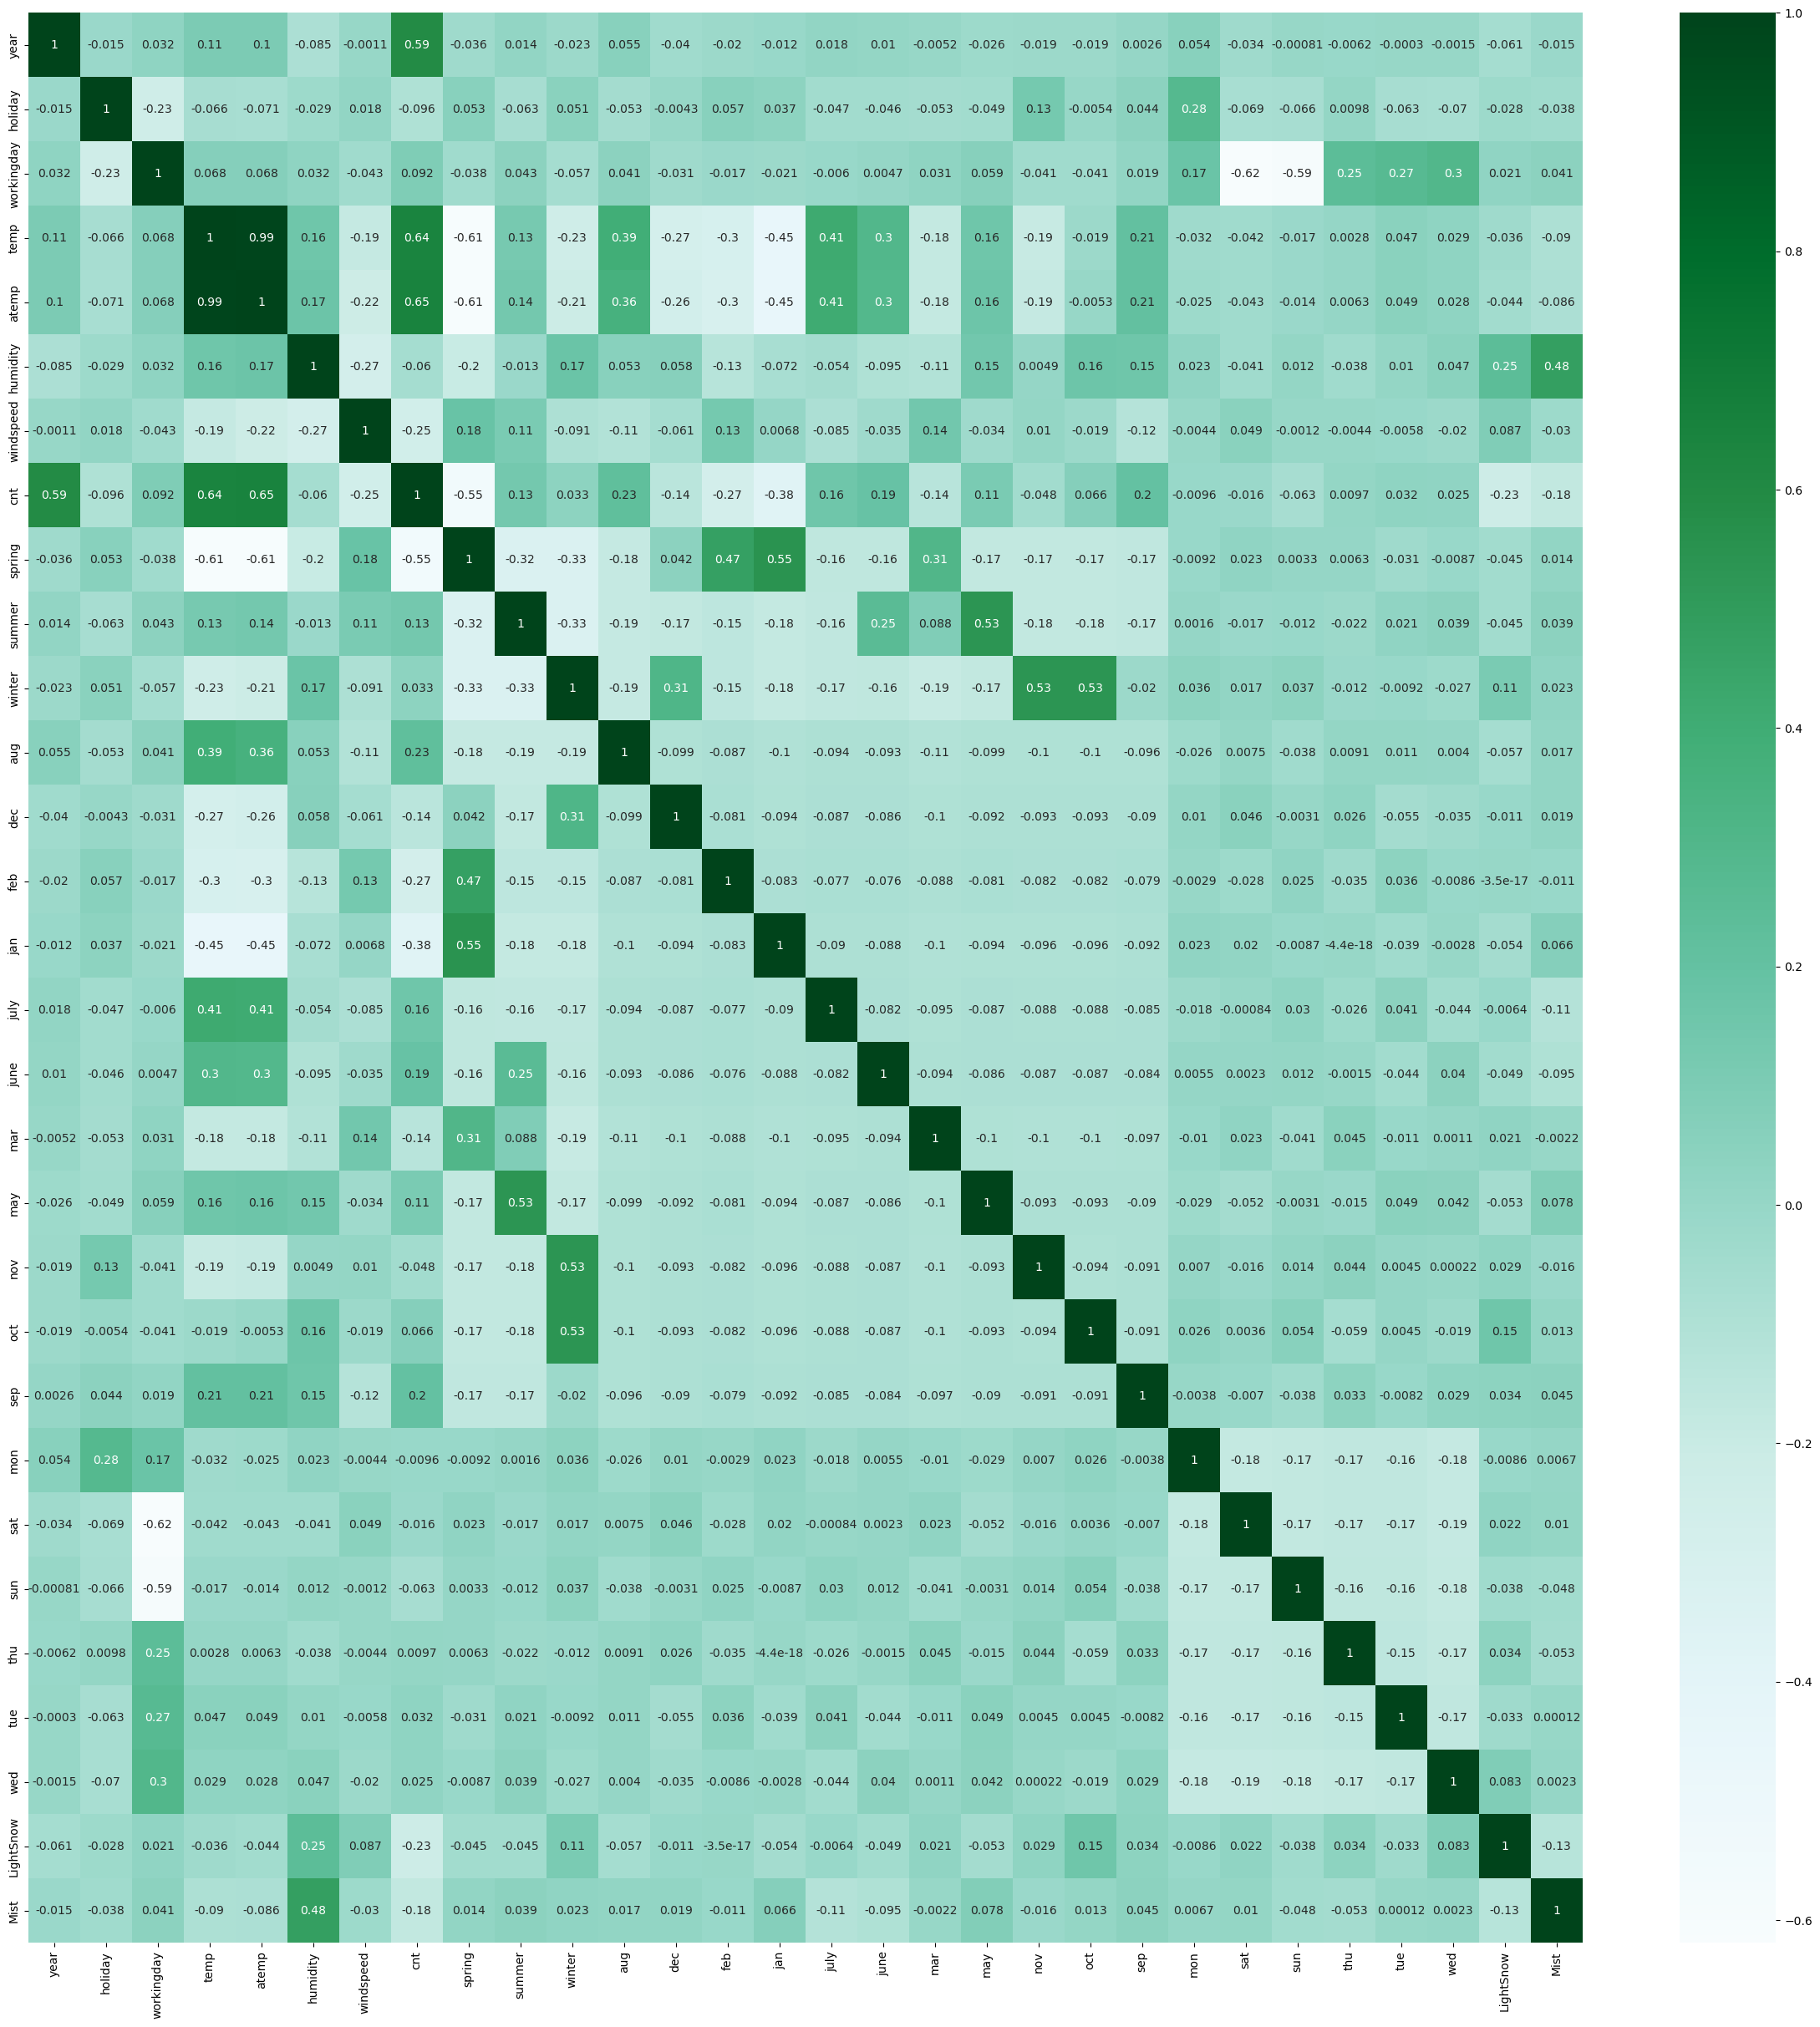

In [57]:
#heat map of all the columns to visualize correlation
plt.figure(figsize = (30,30))
sns.heatmap(data_train.corr(), cmap='BuGn', annot = True)
plt.show()

#### Observation :
- cnt is having correlation with temp, atemp & year
- mist is haivng correlation with humidity
- winter with oct and nov
- jan has corelation with spring
- summer with may

## Step 5 : Building linear regression model using Recursive Feature Elimination (RFE)

- We will build a Model using automated RFE + manual feature removal approach.
- We will use RFE to get out initial set of columns to start (initial columns size = 15)
- We will use statsmodel library to fit model and then analysize the statistics.
- Based on the P-value and VIF we will eliminate the independent variables from the model.
- We will continue eliminating the variables until we get a model which shows good P-value and accepable VIF
- Our acceptable threshold:

  - P-value < 0.05
  
  - VIF < 5.0

In [61]:
y_train = data_train.pop('cnt')
X_train = data_train
X_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,spring,summer,winter,...,oct,sep,mon,sat,sun,thu,tue,wed,LightSnow,Mist
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,1,0,0,0,0,0,1


## Initial column selection for creating model using RFE. Initial num of coloumns is set to 15

In [63]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [64]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', False, 8),
 ('dec', False, 4),
 ('feb', False, 5),
 ('jan', False, 2),
 ('july', True, 1),
 ('june', False, 11),
 ('mar', False, 12),
 ('may', False, 7),
 ('nov', False, 3),
 ('oct', False, 14),
 ('sep', True, 1),
 ('mon', False, 9),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 15),
 ('tue', False, 10),
 ('wed', False, 13),
 ('LightSnow', True, 1),
 ('Mist', True, 1)]

In [65]:
# Fetch columns selected by RFE
rfe_cols = X_train.columns[rfe.support_]
print(rfe_cols)

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'spring', 'summer', 'winter', 'july', 'sep', 'sat', 'sun', 'LightSnow',
       'Mist'],
      dtype='object')


In [66]:
### Creating some generic methods to build model and calculate VIF

def CreateModel(X_train, y_train):
    lm = sm.OLS(y_train, X_train).fit()
    return lm

def CalcVIF(X_train):
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

###  Building 1st Model (using features selected by RFE)

In [68]:
## Creatig X_train dataframe with RFE selected columns
X_train = X_train[rfe_cols]

In [69]:
X_train_lm = sm.add_constant(X_train)
model_1 = CreateModel(X_train_lm, y_train)
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          1.13e-191
Time:                        00:52:40   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1989      0.028      7.181      0.000       0.144       0.253
year           0.2297      0.008     28.660      0.000       0.214       0.245
holiday       -0.0190      0.021     -0.892      0.373      -0.061       0.023
workingday     0.0837      0.010      8.672      0.000       0.065       0.103
temp           0.5278      0.033     15.897      0.000       0.463       0.593
humidity      -0.1595      0.037     -4.268      0.000      -0.233      -0.086
windspeed     -0.1806      0.025     -7.110      0.000      -0.231      -0.131
spring        -0.0554      0.021     -2.694      0.007      -0.096      -0.015
summer         0.0526      0.015      3.553      0.000       0.024       0.082
winter         0.1003      0.017      5.890      0.000       0.067       0.134
july          -0.0549      0.018     -3.035      0.003      -0.090      -0.019
sep            0.0818      0.016      4.956      0.000       0.049       0.114
sat            0.0937      0.012      8.045      0.000       0.071       0.117
sun            0.0405      0.012      3.304      0.001       0.016       0.065
LightSnow     -0.2463      0.026     -9.449      0.000      -0.298      -0.195
Mist          -0.0578      0.010     -5.559      0.000      -0.078      -0.037
==============================================================================
Omnibus:                       64.879   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.454
Skew:                          -0.661   Prob(JB):                     3.91e-35
Kurtosis:                       5.390   Cond. No.                     1.39e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.83e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [70]:
CalcVIF(X_train)

      Features    VIF
2   workingday  50.69
11         sat  12.20
12         sun  11.79
6       spring   5.02
3         temp   3.62
8       winter   3.49
1      holiday   2.91
7       summer   2.61
4     humidity   1.91
14        Mist   1.57
9         july   1.49
10         sep   1.30
13   LightSnow   1.25
5    windspeed   1.20
0         year   1.03


#### Observation : `workingday` has very high VIF. So we will remove feature `workingday` in our next model

### Building 2nd Model

In [73]:
# remove the feature workingday
X_train = X_train.drop(['workingday'], axis=1)

In [74]:
# build model
X_train_lm = sm.add_constant(X_train)
model_2 = CreateModel(X_train_lm, y_train)
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          1.13e-191
Time:                        00:52:40   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2826      0.034      8.286      0.000       0.216       0.350
year           0.2297      0.008     28.660      0.000       0.214       0.245
holiday       -0.1027      0.025     -4.047      0.000      -0.152      -0.053
temp           0.5278      0.033     15.897      0.000       0.463       0.593
humidity      -0.1595      0.037     -4.268      0.000      -0.233      -0.086
windspeed     -0.1806      0.025     -7.110      0.000      -0.231      -0.131
spring        -0.0554      0.021     -2.694      0.007      -0.096      -0.015
summer         0.0526      0.015      3.553      0.000       0.024       0.082
winter         0.1003      0.017      5.890      0.000       0.067       0.134
july          -0.0549      0.018     -3.035      0.003      -0.090      -0.019
sep            0.0818      0.016      4.956      0.000       0.049       0.114
sat            0.0100      0.011      0.896      0.371      -0.012       0.032
sun           -0.0432      0.012     -3.744      0.000      -0.066      -0.021
LightSnow     -0.2463      0.026     -9.449      0.000      -0.298      -0.195
Mist          -0.0578      0.010     -5.559      0.000      -0.078      -0.037
==============================================================================
Omnibus:                       64.879   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.454
Skew:                          -0.661   Prob(JB):                     3.91e-35
Kurtosis:                       5.390   Cond. No.                         19.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
CalcVIF(X_train)

     Features    VIF
3    humidity  28.28
2        temp  16.06
4   windspeed   4.68
5      spring   4.03
7      winter   3.37
6      summer   2.78
13       Mist   2.30
0        year   2.08
8        july   1.59
9         sep   1.39
12  LightSnow   1.24
10        sat   1.23
11        sun   1.23
1     holiday   1.06


### Observation : humidity has very high VIF
We will remove feature humidity from training set before creating next model

### Building 3rd Model¶

In [78]:
# remove then feature humidity
X_train = X_train.drop(['humidity'], axis=1)

In [79]:
# build model
X_train_lm = sm.add_constant(X_train)
model_3 = CreateModel(X_train_lm, y_train)
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.0
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          5.73e-189
Time:                        00:52:40   Log-Likelihood:                 508.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     496   BIC:                            -930.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2039      0.029      6.987      0.000       0.147       0.261
year           0.2336      0.008     28.839      0.000       0.218       0.250
holiday       -0.1034      0.026     -4.008      0.000      -0.154      -0.053
temp           0.4920      0.033     15.056      0.000       0.428       0.556
windspeed     -0.1491      0.025     -6.032      0.000      -0.198      -0.101
spring        -0.0653      0.021     -3.139      0.002      -0.106      -0.024
summer         0.0465      0.015      3.101      0.002       0.017       0.076
winter         0.0859      0.017      5.058      0.000       0.053       0.119
july          -0.0500      0.018     -2.723      0.007      -0.086      -0.014
sep            0.0758      0.017      4.532      0.000       0.043       0.109
sat            0.0117      0.011      1.037      0.300      -0.011       0.034
sun           -0.0463      0.012     -3.947      0.000      -0.069      -0.023
LightSnow     -0.2904      0.024    -11.931      0.000      -0.338      -0.243
Mist          -0.0835      0.009     -9.669      0.000      -0.100      -0.067
==============================================================================
Omnibus:                       66.977   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              163.728
Skew:                          -0.681   Prob(JB):                     2.80e-36
Kurtosis:                       5.419   Cond. No.                         17.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
CalcVIF(X_train)

     Features   VIF
2        temp  5.18
3   windspeed  4.62
5      summer  2.23
4      spring  2.13
0        year  2.07
6      winter  1.84
7        july  1.59
12       Mist  1.55
8         sep  1.34
9         sat  1.23
10        sun  1.22
11  LightSnow  1.08
1     holiday  1.06


### Observation : sat has very high VIF
We will remove feature `sat` from training set before creating next model

### Building 4th Model

In [83]:
# remove the feature sat
X_train = X_train.drop(['sat'], axis=1)

In [84]:
# build model
X_train_lm = sm.add_constant(X_train)
model_4 = CreateModel(X_train, y_train)
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    cnt   R-squared (uncentered):                   0.972
Model:                            OLS   Adj. R-squared (uncentered):              0.971
Method:                 Least Squares   F-statistic:                              1442.
Date:                Wed, 27 Nov 2024   Prob (F-statistic):                        0.00
Time:                        00:52:41   Log-Likelihood:                          483.54
No. Observations:                 510   AIC:                                     -943.1
Df Residuals:                     498   BIC:                                     -892.3
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
year           0.2365      0.008     27.899      0.000       0.220       0.253
holiday       -0.1017      0.027     -3.774      0.000      -0.155      -0.049
temp           0.6947      0.016     42.509      0.000       0.663       0.727
windspeed     -0.0983      0.025     -3.961      0.000      -0.147      -0.050
spring         0.0561      0.012      4.538      0.000       0.032       0.080
summer         0.1094      0.013      8.651      0.000       0.085       0.134
winter         0.1787      0.011     15.742      0.000       0.156       0.201
july          -0.0363      0.019     -1.897      0.058      -0.074       0.001
sep            0.1010      0.017      5.895      0.000       0.067       0.135
sun           -0.0441      0.012     -3.652      0.000      -0.068      -0.020
LightSnow     -0.2836      0.026    -11.122      0.000      -0.334      -0.234
Mist          -0.0733      0.009     -8.209      0.000      -0.091      -0.056
==============================================================================
Omnibus:                       62.612   Durbin-Watson:                   2.098
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.879
Skew:                          -0.707   Prob(JB):                     7.64e-28
Kurtosis:                       4.970   Cond. No.                         7.05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
CalcVIF(X_train)

     Features   VIF
2        temp  5.14
3   windspeed  4.60
5      summer  2.22
4      spring  2.11
0        year  2.07
6      winter  1.82
7        july  1.59
11       Mist  1.55
8         sep  1.34
9         sun  1.18
10  LightSnow  1.08
1     holiday  1.05


### Observation : temp has high VIF
We will remove feature `temp` from training set before creating next model

### Building 5th Model

In [88]:
# remove then feature temp
X_train = X_train.drop(['temp'], axis=1)

In [89]:
# build model
X_train_lm = sm.add_constant(X_train)
model_5 = CreateModel(X_train_lm, y_train)
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     151.0
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          9.32e-151
Time:                        00:52:41   Log-Likelihood:                 412.51
No. Observations:                 510   AIC:                            -801.0
Df Residuals:                     498   BIC:                            -750.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5908      0.017     35.308      0.000       0.558       0.624
year           0.2470      0.010     25.481      0.000       0.228       0.266
holiday       -0.1089      0.031     -3.516      0.000      -0.170      -0.048
windspeed     -0.1705      0.030     -5.741      0.000      -0.229      -0.112
spring        -0.2987      0.017    -17.913      0.000      -0.331      -0.266
summer        -0.0451      0.017     -2.732      0.007      -0.078      -0.013
winter        -0.0749      0.016     -4.717      0.000      -0.106      -0.044
july          -0.0102      0.022     -0.465      0.642      -0.053       0.033
sep            0.0717      0.020      3.558      0.000       0.032       0.111
sun           -0.0489      0.014     -3.523      0.000      -0.076      -0.022
LightSnow     -0.3023      0.029    -10.309      0.000      -0.360      -0.245
Mist          -0.0929      0.010     -8.953      0.000      -0.113      -0.073
==============================================================================
Omnibus:                       27.791   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.314
Skew:                          -0.297   Prob(JB):                     1.32e-13
Kurtosis:                       4.561   Cond. No.                         9.22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
CalcVIF(X_train)

     Features   VIF
2   windspeed  3.82
3      spring  2.09
4      summer  2.02
0        year  1.83
5      winter  1.78
10       Mist  1.51
6        july  1.21
8         sun  1.17
7         sep  1.16
9   LightSnow  1.08
1     holiday  1.05


### Observation : feature july has high P- value. So we will remove july in next model creation

### Building 6th Model

In [93]:
# remove then feature july
X_train = X_train.drop(['july'], axis=1)

In [94]:
# build model
X_train_lm = sm.add_constant(X_train)
model_6 = CreateModel(X_train_lm, y_train)
model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     166.3
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          7.84e-152
Time:                        00:52:41   Log-Likelihood:                 412.40
No. Observations:                 510   AIC:                            -802.8
Df Residuals:                     499   BIC:                            -756.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5870      0.015     40.063      0.000       0.558       0.616
year           0.2471      0.010     25.506      0.000       0.228       0.266
holiday       -0.1087      0.031     -3.512      0.000      -0.169      -0.048
windspeed     -0.1704      0.030     -5.743      0.000      -0.229      -0.112
spring        -0.2951      0.015    -20.008      0.000      -0.324      -0.266
summer        -0.0415      0.015     -2.849      0.005      -0.070      -0.013
winter        -0.0715      0.014     -5.085      0.000      -0.099      -0.044
sep            0.0745      0.019      3.885      0.000       0.037       0.112
sun           -0.0492      0.014     -3.545      0.000      -0.076      -0.022
LightSnow     -0.3024      0.029    -10.322      0.000      -0.360      -0.245
Mist          -0.0926      0.010     -8.949      0.000      -0.113      -0.072
==============================================================================
Omnibus:                       27.872   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.127
Skew:                          -0.301   Prob(JB):                     1.45e-13
Kurtosis:                       4.556   Cond. No.                         8.83
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [95]:
CalcVIF(X_train)

    Features   VIF
2  windspeed  3.49
3     spring  1.92
4     summer  1.86
0       year  1.78
5     winter  1.66
9       Mist  1.51
7        sun  1.16
6        sep  1.14
8  LightSnow  1.08
1    holiday  1.05


In [96]:
model_6.params

const        0.587019
year         0.247088
holiday     -0.108669
windspeed   -0.170448
spring      -0.295092
summer      -0.041506
winter      -0.071465
sep          0.074532
sun         -0.049155
LightSnow   -0.302387
Mist        -0.092621
dtype: float64

In [97]:
finalCols = X_train.columns
finalCols

Index(['year', 'holiday', 'windspeed', 'spring', 'summer', 'winter', 'sep',
       'sun', 'LightSnow', 'Mist'],
      dtype='object')

In [98]:
#train data rsquared
print("train data r2=", model_6.rsquared)

train data r2= 0.7692101430002797


## Step 6 : Resudual analysis of the train data

In [100]:
y_train_pred = model_6.predict(X_train_lm)

#### Normality of error term

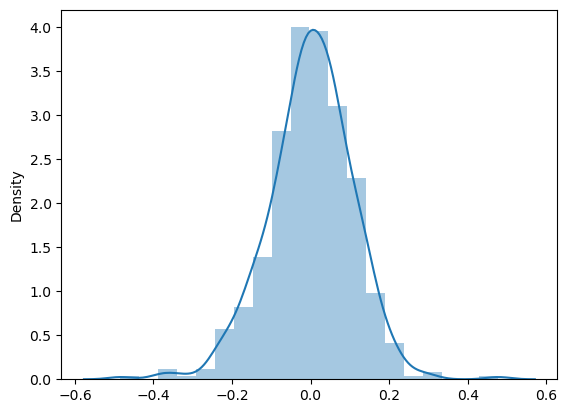

In [102]:
sns.distplot(y_train-y_train_pred, bins=20)
plt.show()

#### Observation : We can observe that the error is normally distributed with mean centered around 0

#### Investigation of collinearity among the independent features

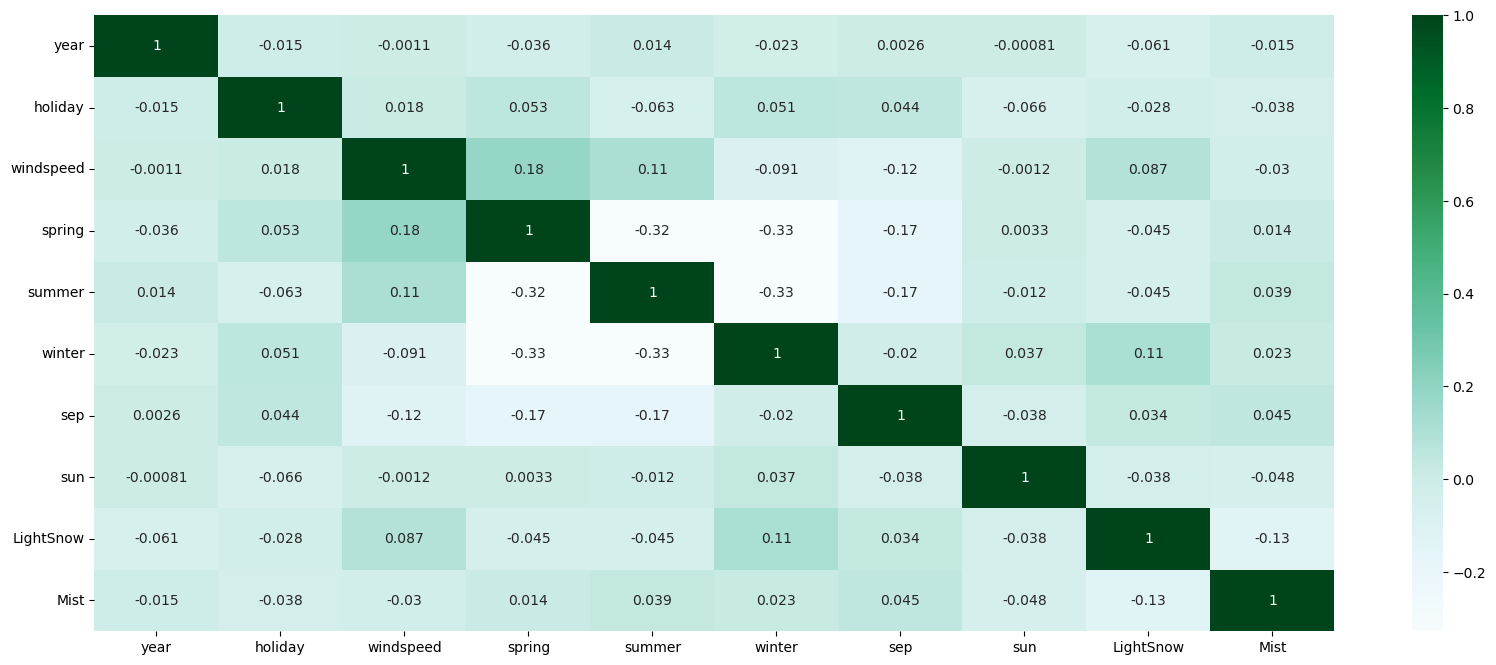

In [105]:
plt.figure(figsize=(20,8))
sns.heatmap(X_train.corr(), annot=True, cmap='BuGn')
plt.show()

### Observation : There is no multicollinearity among the independent variable.

#### Error term have constant variance.

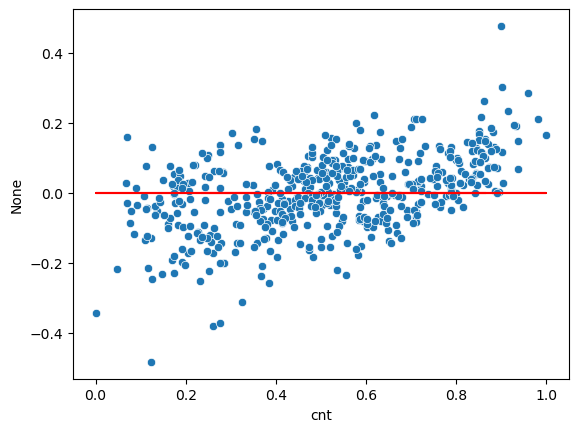

In [108]:
sns.scatterplot(x=y_train, y= y_train - y_train_pred)
plt.plot(y_train,(y_train - y_train), '-r')
plt.show()

#### Observation : Error term has constant varaince

## Step 7 : Prediction on test set

In [111]:
# transform the numerical columns of test data set
data_test[numericalCols] = scaler.transform(data_test[numericalCols])

In [112]:
data_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,LightSnow,Mist
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,0,0,1,0,0,0,0


In [113]:
y_test = data_test.pop('cnt')
X_test = data_test

#### After creating final model_6 we are left with few folumns

finalCols= ['year', 'holiday', 'windspeed', 'spring', 'summer', 'winter', 'sep',
       'sun', 'LightSnow', 'Mist']


In [115]:
X_test = X_test[finalCols]

In [116]:
X_test.head()

,year,holiday,windspeed,spring,summer,winter,sep,sun,LightSnow,Mist
184,0,1,0.084219,0,0,0,0,0,0,1
535,1,0,0.153728,0,1,0,0,0,0,0
299,0,0,0.334206,0,0,1,0,0,0,1
221,0,0,0.339570,0,0,0,0,0,0,0
152,0,0,0.537414,0,1,0,0,0,0,0


In [117]:
X_test_lm = sm.add_constant(X_test)
y_test_pred = model_6.predict(X_test_lm)  # since model_6 is our final model

## Step 8 : Model evaluation on test set

In [119]:
#evaluate
r2 = r2_score(y_true = y_test, y_pred = y_test_pred)
print('Test r2 = ', r2)

Test r2 =  0.7488640988037656


In [120]:
test_adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print("Test adjusted r2: ",test_adjusted_r2)

Test adjusted r2:  0.7368


### Observation :
- Train data **r2** =  0.7692101430002797
- Test data **r2**= 0.7488640988037656

- Train data **adjusted r2** = 0.765
- Test data **adjusted r2** = 0.7368

In [122]:
model_6.params

const        0.587019
year         0.247088
holiday     -0.108669
windspeed   -0.170448
spring      -0.295092
summer      -0.041506
winter      -0.071465
sep          0.074532
sun         -0.049155
LightSnow   -0.302387
Mist        -0.092621
dtype: float64

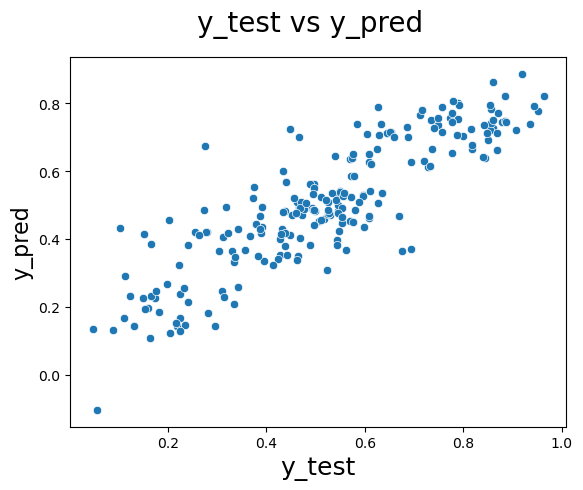

In [123]:
fig = plt.figure()
sns.scatterplot(x=y_test, y=y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

Final linear Regression Model is:

**cnt** = `year` x 0.247088 - `holiday` x 0.108669 - `windspeed` x 0.170448  - `spring` x 0.295092 - `summer` x 0.041506 - `winter` x 0.071465 + `sept` x 0.074532 - `sun` x 0.049155 - `lightSnow` x 0.302387 - `Mist` x 0.092621  + 0.587019

### Thankyou